# EDA AND FEATURE ENGINEERING

In [6]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

directory_name = "Cleaned data"

#if not os.path.exists(directory_name):
   # os.makedirs(directory_name)

In [9]:

path = 'Cleaned data'

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f) for f in csv_files]

# Merging the dataframes on the 'DATE' column
df_final = pd.concat(dfs,ignore_index=False).groupby('DATE').sum()

In [10]:

df_final.head()

,all_Const_Emp,emratio,GDP,RHORUSQ156N,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,POP,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,710.3,63.2,5872.701,64.0,1551.0,4783.8,138.1363,66.8,7.0,9.8950,...,1508.0,891.0,1748.0,248659.0,101.7,122.2,7.9,76.527,5422.0,5.4
1990-02-01,707.3,63.2,5872.701,64.0,1437.0,4819.8,134.7538,66.7,7.6,10.1975,...,1352.0,898.0,1329.0,248827.0,101.7,122.2,8.5,76.587,5416.0,5.3
1990-03-01,703.0,63.2,5872.701,64.0,1289.0,4842.7,132.5115,66.7,7.8,10.2680,...,1345.0,885.0,1246.0,249012.0,102.0,122.2,8.3,76.790,5392.0,5.2
1990-04-01,692.5,63.0,5960.028,63.7,1248.0,4883.8,127.1853,66.6,8.3,10.3700,...,1332.0,872.0,1136.0,249306.0,102.5,122.2,8.7,77.038,5355.0,5.4
1990-05-01,688.6,63.1,5960.028,63.7,1212.0,4889.5,123.8842,66.6,8.2,10.4775,...,1351.0,858.0,1067.0,249565.0,102.5,122.2,8.7,77.297,5321.0,5.4


In [11]:


df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 1990-01-01 to 2023-07-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   all_Const_Emp         403 non-null    float64
 1   emratio               403 non-null    float64
 2   GDP                   403 non-null    float64
 3   RHORUSQ156N           403 non-null    float64
 4   house_st              403 non-null    float64
 5   income                403 non-null    float64
 6   IPI_Cement            403 non-null    float64
 7   labor_percent         403 non-null    float64
 8   monthly_supply        403 non-null    float64
 9   mortgage_rate         403 non-null    float64
 10  MSPUS                 403 non-null    float64
 11  new_private_house     403 non-null    float64
 12  new_private_hw_under  403 non-null    float64
 13  permit                403 non-null    float64
 14  POP                   403 non-null    float64
 15  PPI_Cement  

In [12]:

df_final.describe()

,all_Const_Emp,emratio,GDP,RHORUSQ156N,house_st,income,IPI_Cement,labor_percent,monthly_supply,mortgage_rate,...,new_private_house,new_private_hw_under,permit,POP,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,743.305707,61.273449,13950.365203,65.959057,1322.449132,11787.236476,119.318099,65.036476,5.824318,5.961387,...,1279.759305,951.399504,1346.878412,297286.064734,183.601697,185.044747,6.175931,147.420568,6384.610422,5.789082
std,129.025090,2.131781,5631.757882,1.714697,390.240842,4979.548117,24.912070,1.842056,1.791468,1.892410,...,359.052171,301.408479,405.443167,25609.641864,54.870712,50.097769,2.953814,58.993940,942.795478,1.744980
min,542.600000,51.300000,5872.701000,62.900000,478.000000,4783.800000,66.350800,60.100000,3.300000,2.684000,...,520.000000,414.000000,513.000000,248659.000000,101.700000,122.200000,1.400000,75.137000,4570.000000,3.400000
25%,629.300000,59.650000,8969.699000,64.300000,1081.000000,7565.700000,100.059100,63.000000,4.400000,4.192000,...,1069.500000,741.500000,1070.500000,275700.000000,144.900000,142.000000,4.800000,89.784500,5587.000000,4.500000
50%,744.000000,61.700000,14039.560000,65.700000,1348.000000,11417.800000,112.648400,66.000000,5.400000,6.065000,...,1307.000000,973.000000,1357.000000,299835.000000,186.900000,169.400000,5.900000,144.705000,6630.000000,5.400000
75%,828.900000,62.900000,18063.529000,67.500000,1579.000000,15313.750000,141.531350,66.600000,6.700000,7.335750,...,1528.000000,1135.000000,1643.500000,320053.429500,217.500000,208.200000,7.000000,181.712000,7189.000000,6.700000
max,1022.000000,64.700000,27644.463000,69.200000,2273.000000,24471.800000,192.032200,67.300000,12.200000,10.477500,...,2245.000000,1710.000000,2263.000000,335244.204000,331.468000,336.455000,32.000000,310.110000,7967.000000,14.700000


### Plotting density plot for all the numerical features


<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

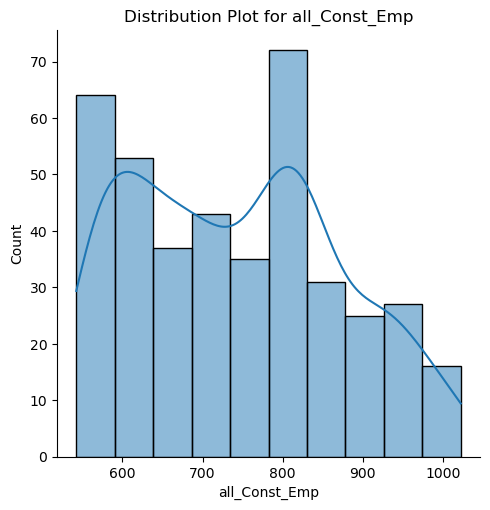

<Figure size 600x400 with 0 Axes>

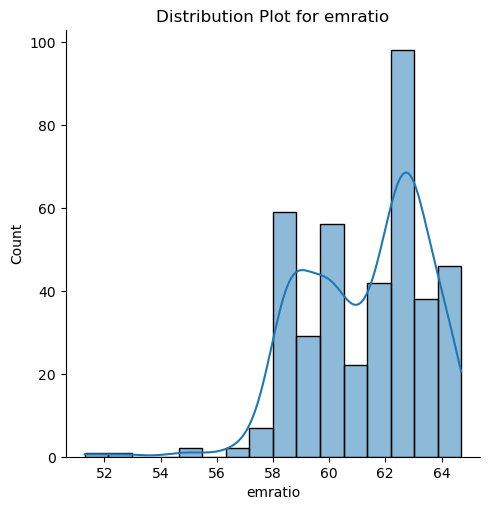

<Figure size 600x400 with 0 Axes>

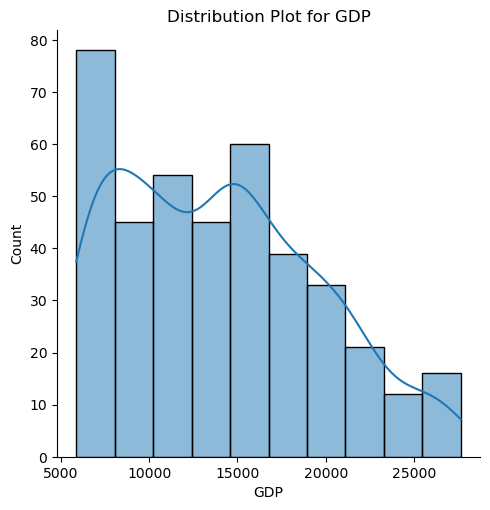

<Figure size 600x400 with 0 Axes>

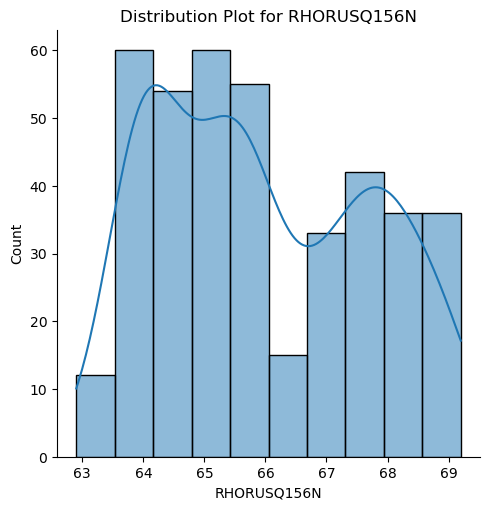

<Figure size 600x400 with 0 Axes>

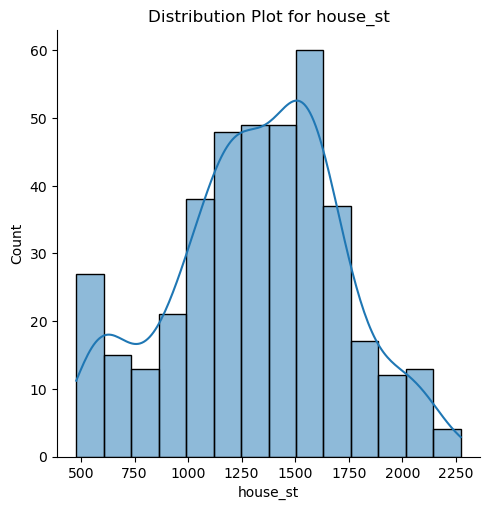

<Figure size 600x400 with 0 Axes>

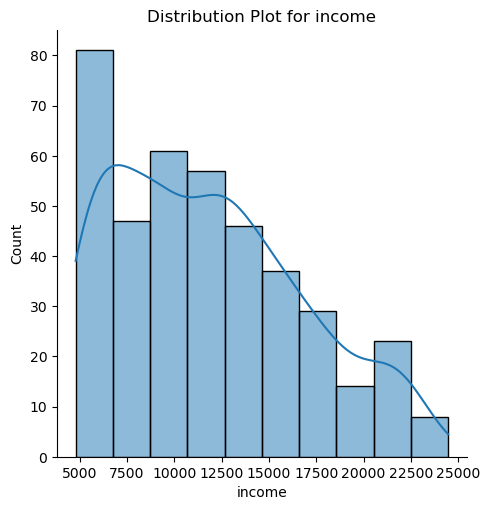

<Figure size 600x400 with 0 Axes>

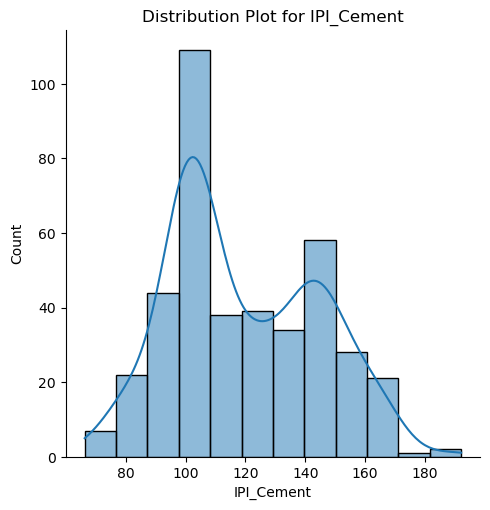

<Figure size 600x400 with 0 Axes>

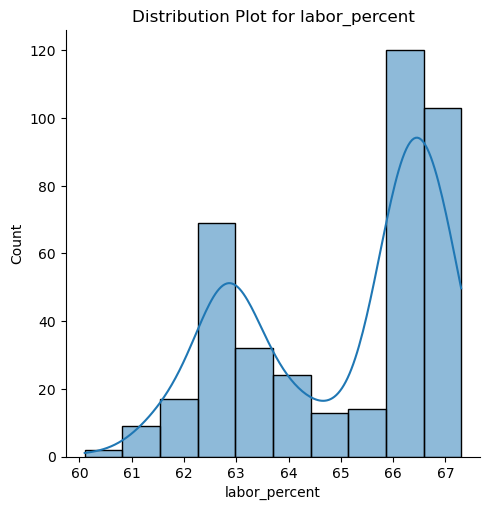

<Figure size 600x400 with 0 Axes>

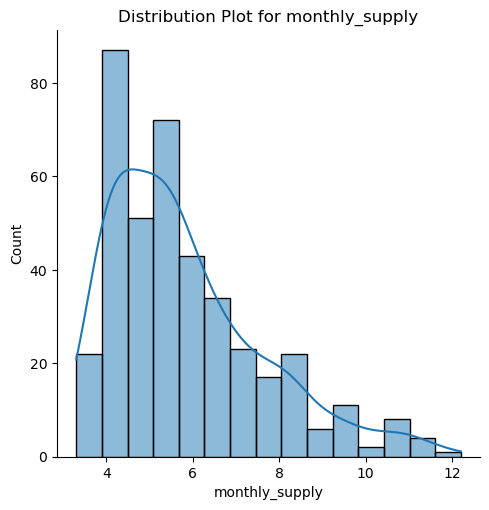

<Figure size 600x400 with 0 Axes>

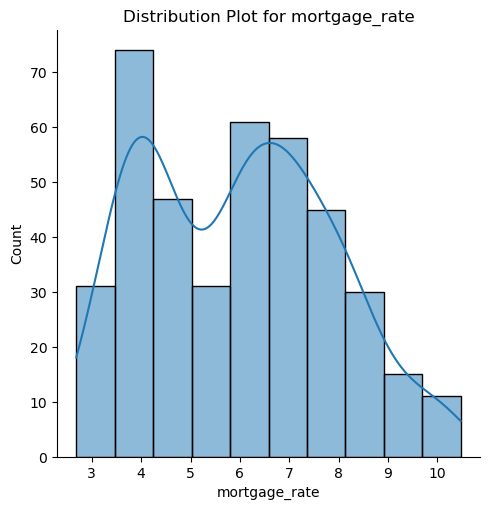

<Figure size 600x400 with 0 Axes>

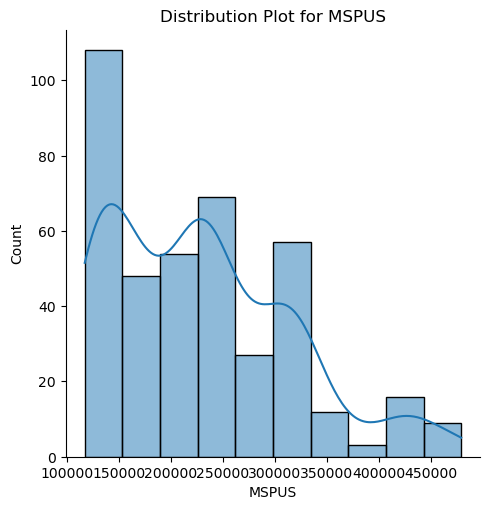

<Figure size 600x400 with 0 Axes>

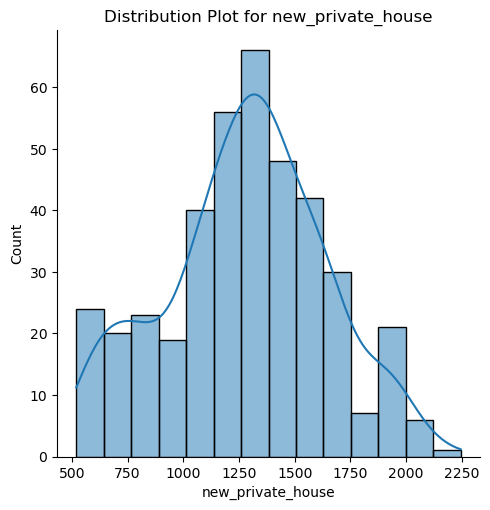

<Figure size 600x400 with 0 Axes>

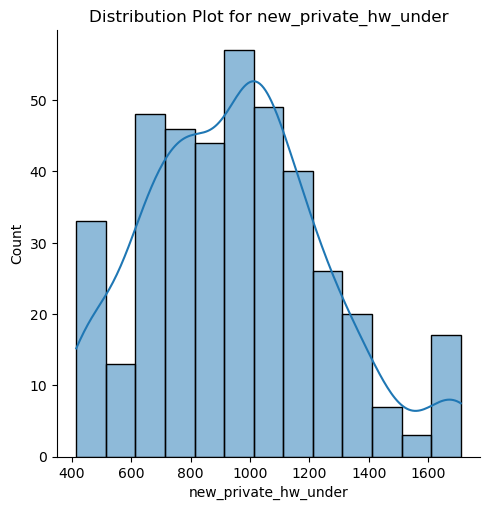

<Figure size 600x400 with 0 Axes>

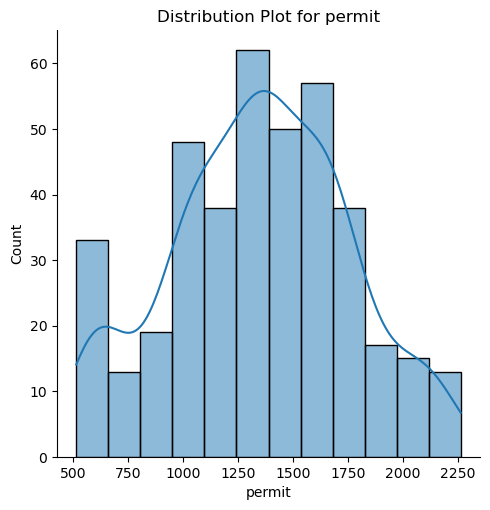

<Figure size 600x400 with 0 Axes>

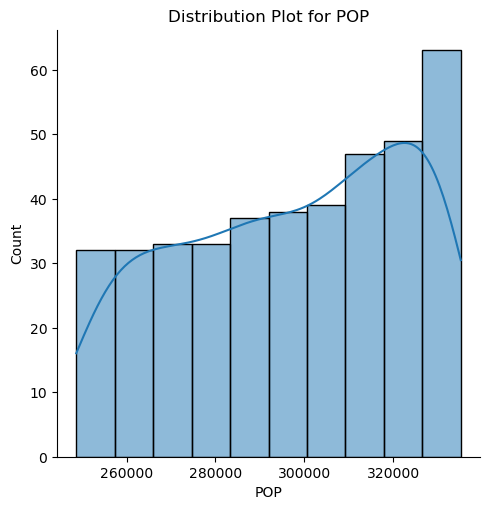

<Figure size 600x400 with 0 Axes>

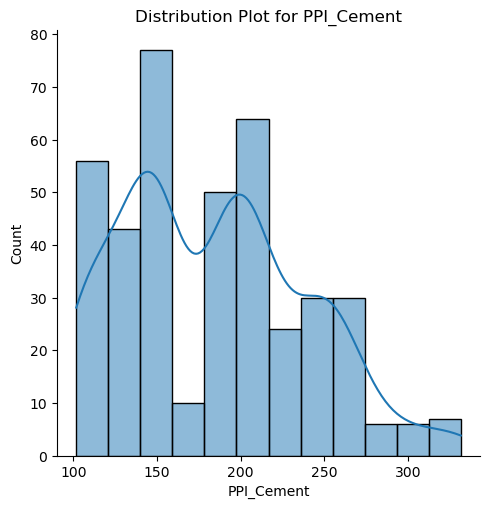

<Figure size 600x400 with 0 Axes>

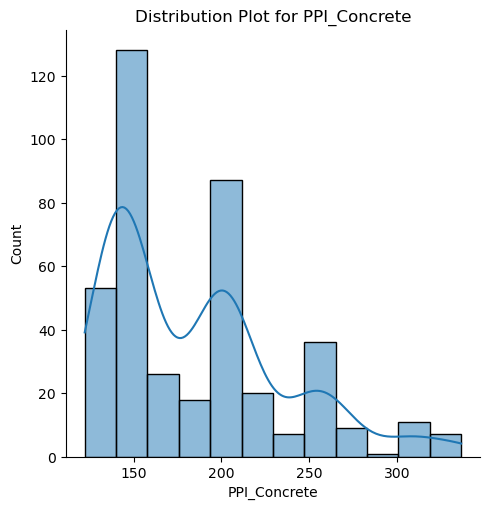

<Figure size 600x400 with 0 Axes>

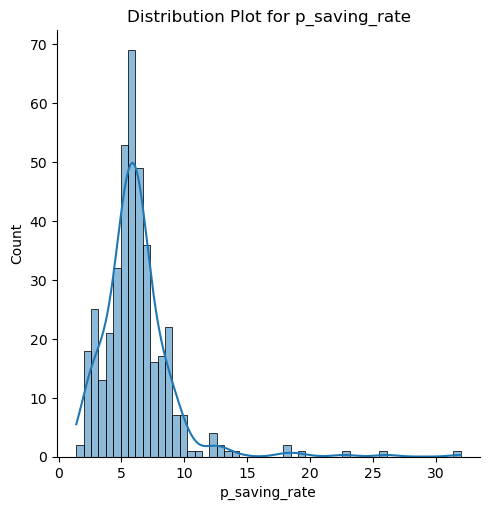

<Figure size 600x400 with 0 Axes>

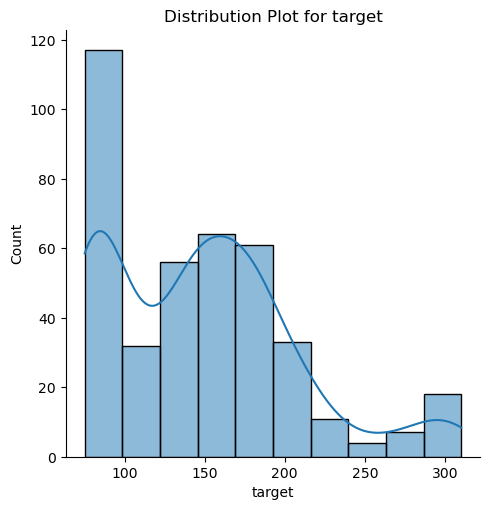

<Figure size 600x400 with 0 Axes>

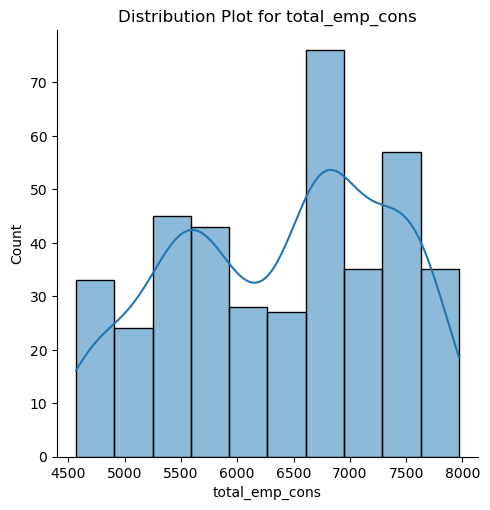

<Figure size 600x400 with 0 Axes>

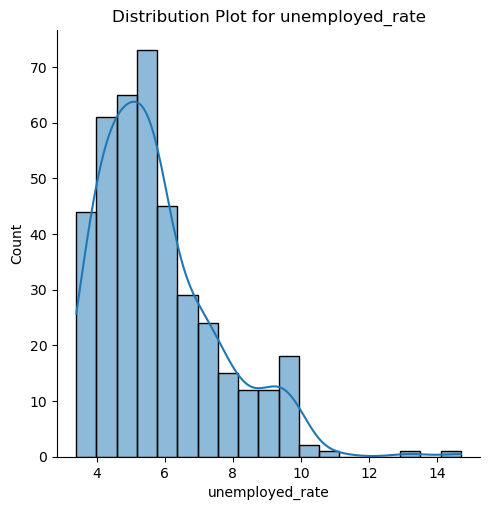

In [13]:
plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_final, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

<Figure size 1200x600 with 0 Axes>

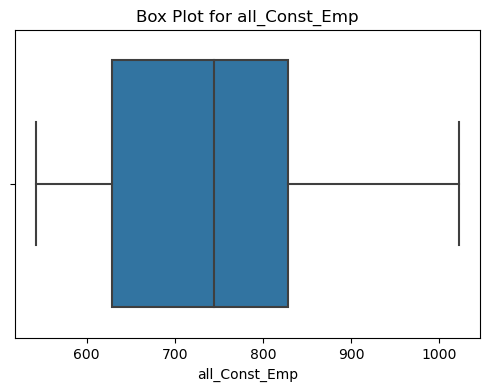

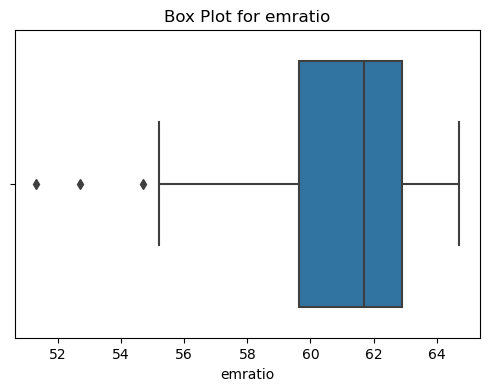

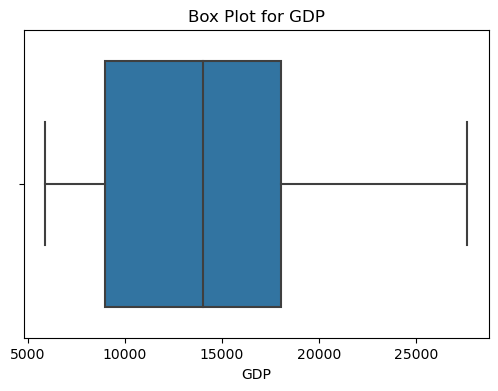

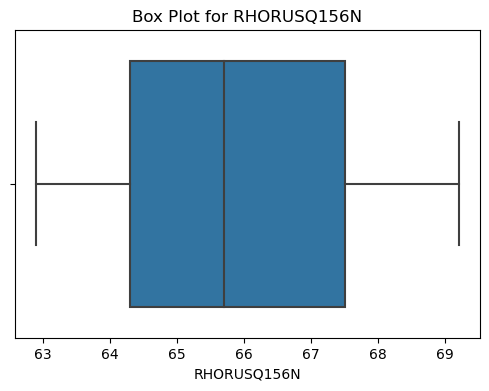

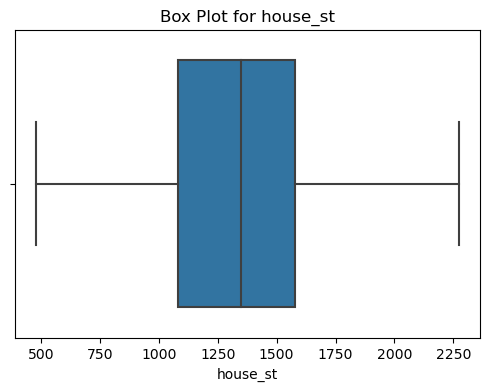

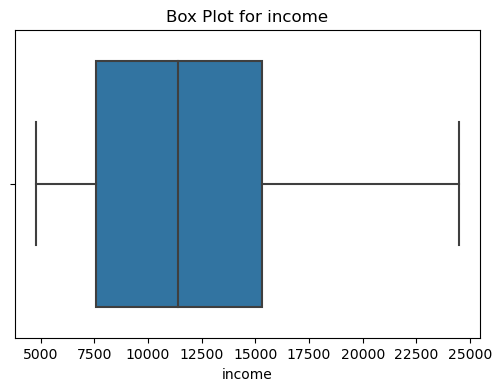

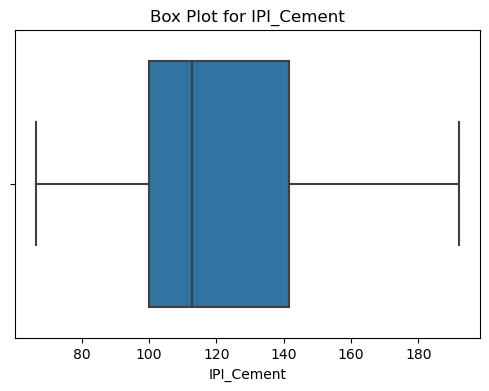

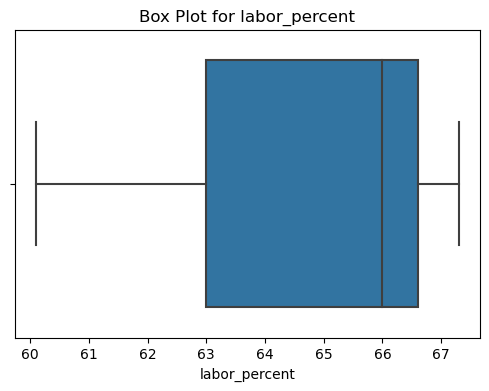

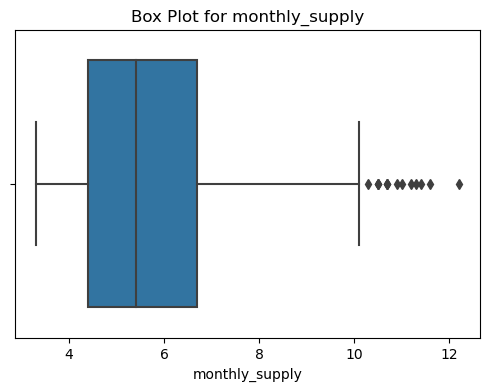

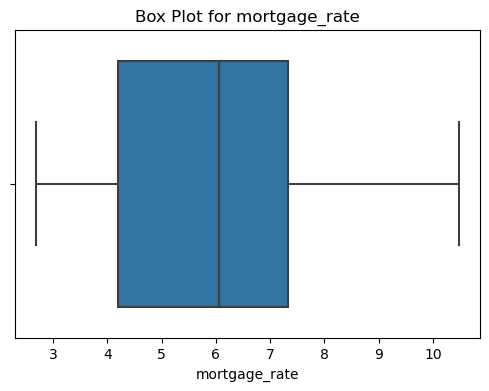

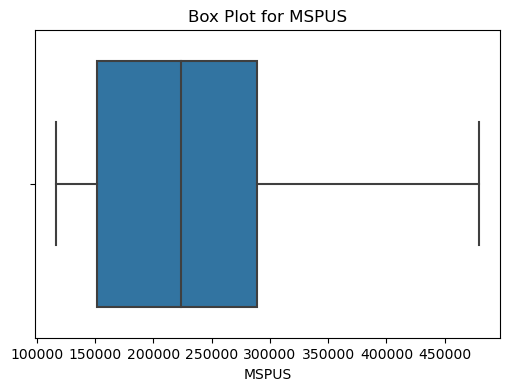

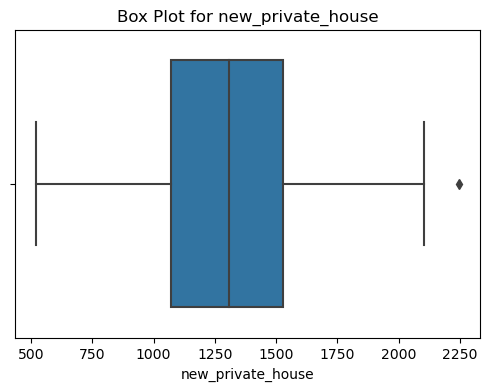

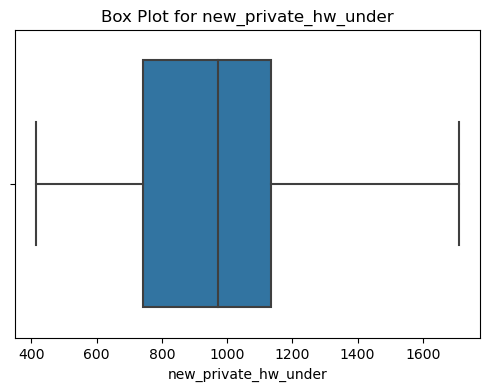

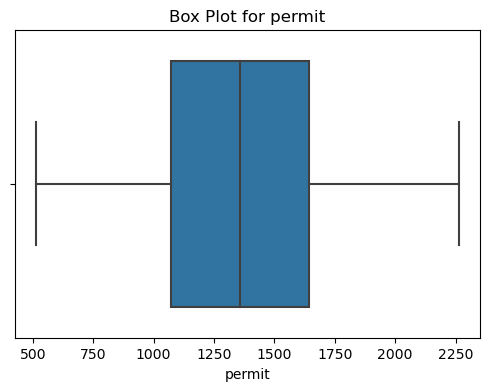

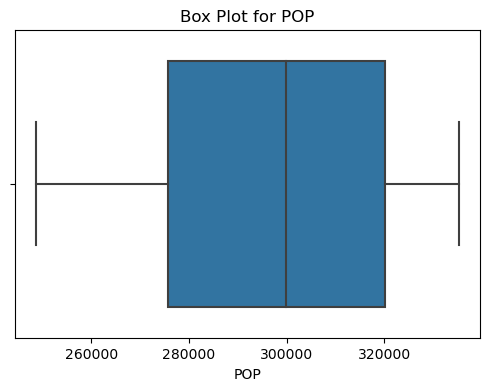

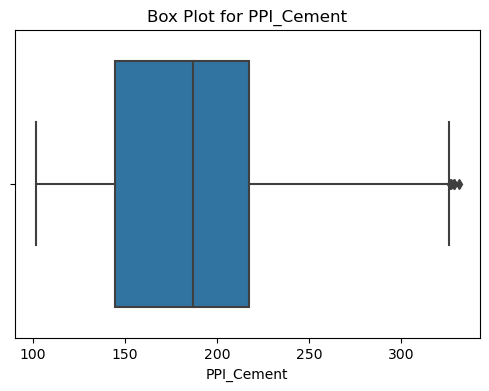

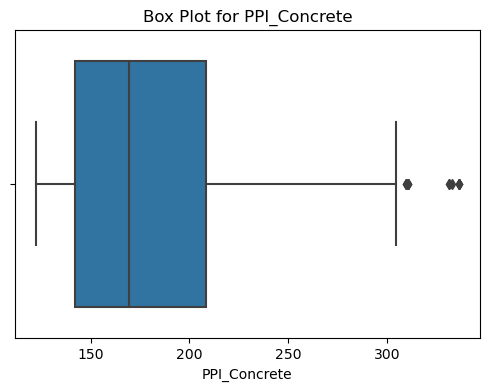

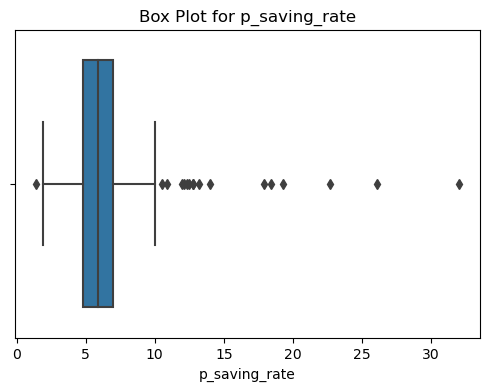

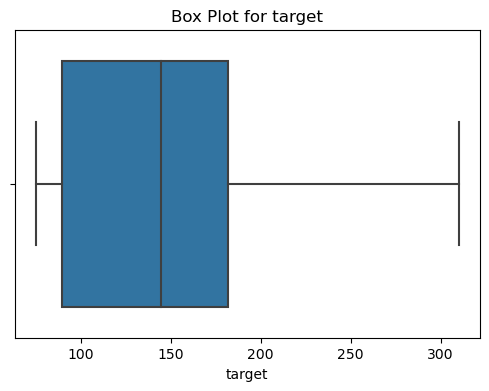

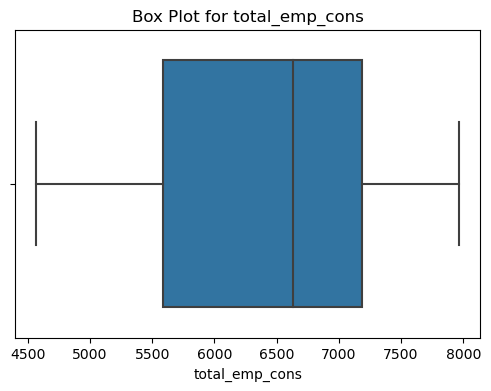

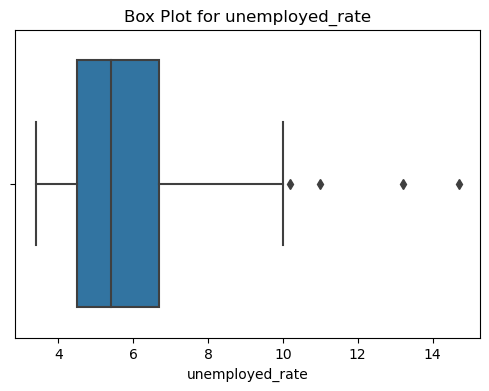

In [14]:

plt.figure(figsize=(12, 6))
for col in df_final.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

#### We have outliers in few features:

1. p_saving_rate
2. PPI_Concrete
3. new_private_house
4. emratio
5. new_private_hw_under
6. monthly_supply
7. unemployed_rate

### Treating Skewness and Outliers:
##### p_saving_rate

In [15]:

df_final['p_saving_rate'].skew()

3.5085100421854896

  Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [16]:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1
     

In [17]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
     

1.4999999999999996
10.3


(None, None)

In [18]:

# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

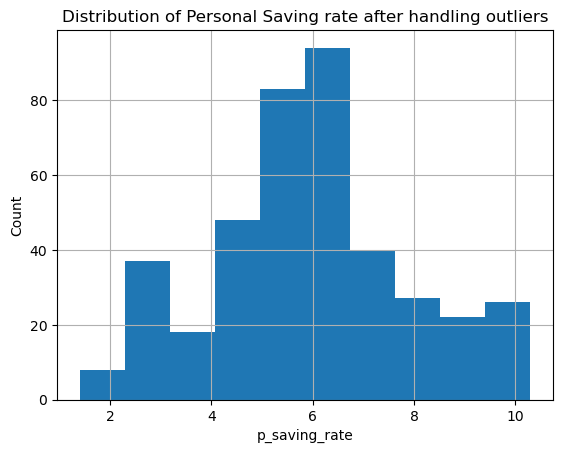

In [19]:
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()
     

PPI_Concrete

In [20]:
df_final['PPI_Concrete'].skew()

0.9843978518457154

Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

In [22]:

df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])

<Axes: >

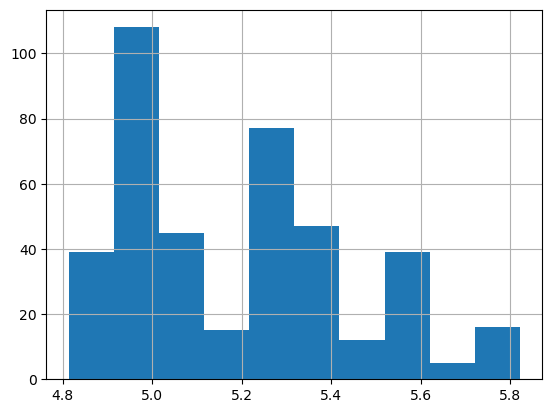

In [23]:
df_final['PPI_Concrete'].hist()


plt.boxplot(df_final['PPI_Concrete'], vert=False)
plt.xlabel('PPI_Concrete')
plt.title('Box Plot of PPI_Concrete')
plt.show()

Skewness and outliers both removed by using log transformation.

New Prvate Home

In [25]:

df_final['new_private_house'].skew()

-0.09694298866652597

New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply yeo-johnson transformation for removing skewness.

In [26]:

from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

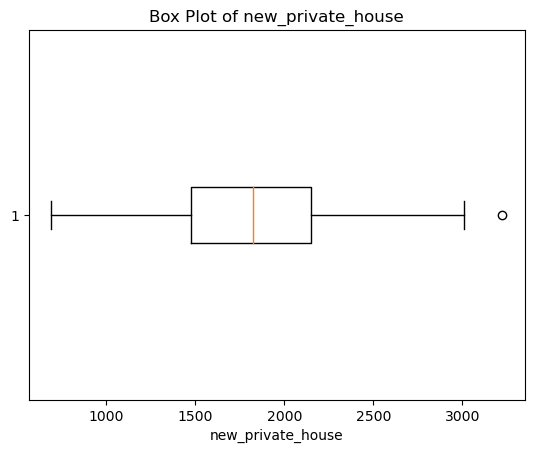

In [27]:
plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()
     

In [28]:

max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])


emratio

In [29]:

df_final['emratio'].skew()
     

-0.6519976290359962

Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [30]:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emratio"].quantile(0.25)
q2 = df_final["emratio"].quantile(0.75)

IQR =q2-q1

In [31]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

54.77500000000002
67.77499999999999


(None, None)

In [32]:

df_final.loc[df_final['emratio'] <=lower_bridge,'emratio'] = lower_bridge
     

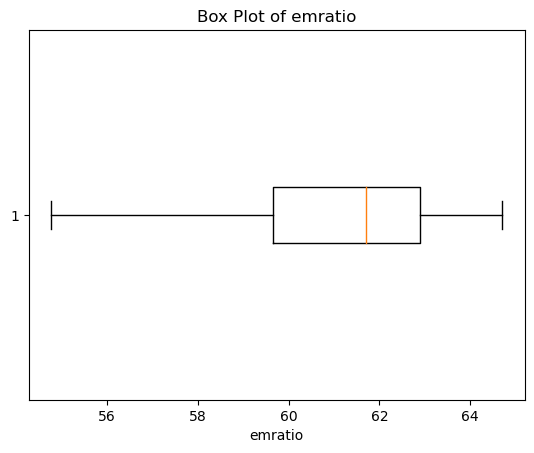

In [33]:

plt.boxplot(df_final['emratio'], vert=False)
plt.xlabel('emratio')
plt.title('Box Plot of emratio')
plt.show()

new_private_hw_under

In [34]:


df_final['new_private_hw_under'].skew()

0.3809385079899291

New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [35]:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

In [36]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
     

151.25
1725.25


(None, None)

In [37]:

df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

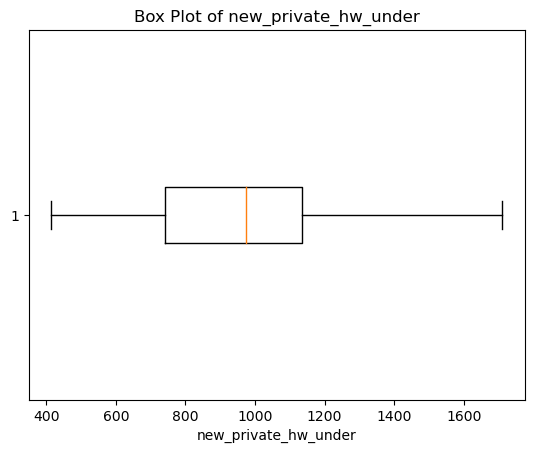

In [38]:
plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()
     

Monthly_supply

In [40]:

df_final['monthly_supply'].skew()

1.1068696913829688

Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [41]:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

In [43]:
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
     


0.9500000000000006
10.15


(None, None)

In [44]:

df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge

<Axes: >

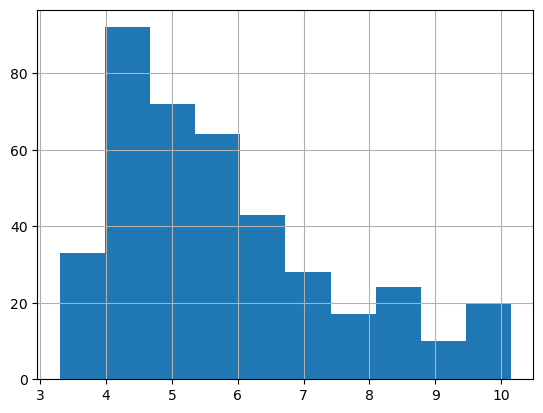

In [45]:
df_final['monthly_supply'].hist()

unemployed_rate

In [46]:
df_final['unemployed_rate'].skew()

1.2129263451326011

In [47]:

#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

In [48]:

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.1999999999999997
10.0


(None, None)

In [49]:


df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge
     

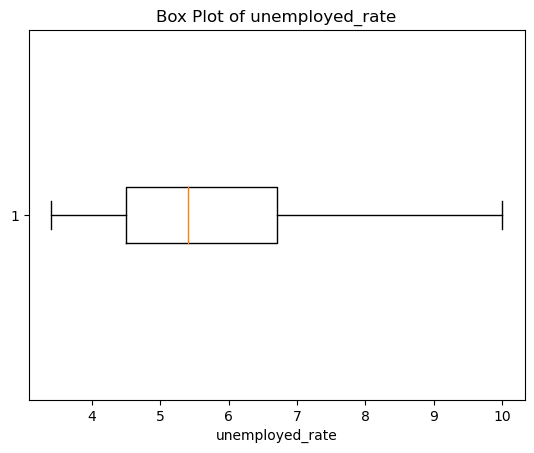

In [50]:

plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

## Understanding the Correlations between the data

In [51]:

corr_matrix= df_final.corr()
corr_matrix['target'].sort_values(ascending=False)

target                  1.000000
MSPUS                   0.977394
PPI_Cement              0.959996
GDP                     0.956264
income                  0.949967
PPI_Concrete            0.936382
POP                     0.894797
total_emp_cons          0.787229
new_private_hw_under    0.694883
all_Const_Emp           0.587502
monthly_supply          0.242584
permit                  0.164303
RHORUSQ156N             0.098989
house_st                0.048265
new_private_house       0.003747
p_saving_rate          -0.245506
IPI_Cement             -0.265593
unemployed_rate        -0.265985
emratio                -0.534276
mortgage_rate          -0.691159
labor_percent          -0.798548
Name: target, dtype: float64

#### Checking Multicollinearity

In [52]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_final.columns

vif_data["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

print(vif_data)
     

                 feature            VIF
0          all_Const_Emp    3685.139973
1                emratio  901730.171658
2                    GDP    4649.014872
3            RHORUSQ156N   27509.732577
4               house_st     524.494170
5                 income    2076.860888
6             IPI_Cement     352.390145
7          labor_percent  903727.700258
8         monthly_supply      82.638017
9          mortgage_rate     217.994010
10                 MSPUS    1258.557106
11     new_private_house     359.736410
12  new_private_hw_under     867.642843
13                permit     548.255585
14                   POP   28038.141320
15            PPI_Cement    1420.677372
16          PPI_Concrete   44872.030983
17         p_saving_rate      53.355572
18                target    1983.212485
19        total_emp_cons    6639.386998
20       unemployed_rate    4255.486152


In [53]:

df_final.to_csv("df_final.csv")
     

## Model Training
### Data Reading

In [61]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [55]:

df = pd.read_csv("df_final.csv")

In [56]:

df.head()

,DATE,all_Const_Emp,emratio,GDP,RHORUSQ156N,house_st,income,IPI_Cement,labor_percent,monthly_supply,...,new_private_house,new_private_hw_under,permit,POP,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
0,1990-01-01,710.3,63.2,5872.701,64.0,1551.0,4783.8,138.1363,66.8,7.0,...,2119.026566,891.0,1748.0,248659.0,101.7,4.813809,7.9,76.527,5422.0,5.4
1,1990-02-01,707.3,63.2,5872.701,64.0,1437.0,4819.8,134.7538,66.7,7.6,...,1888.783189,898.0,1329.0,248827.0,101.7,4.813809,8.5,76.587,5416.0,5.3
2,1990-03-01,703.0,63.2,5872.701,64.0,1289.0,4842.7,132.5115,66.7,7.8,...,1878.483906,885.0,1246.0,249012.0,102.0,4.813809,8.3,76.790,5392.0,5.2
3,1990-04-01,692.5,63.0,5960.028,63.7,1248.0,4883.8,127.1853,66.6,8.3,...,1859.364288,872.0,1136.0,249306.0,102.5,4.813809,8.7,77.038,5355.0,5.4
4,1990-05-01,688.6,63.1,5960.028,63.7,1212.0,4889.5,123.8842,66.6,8.2,...,1887.311688,858.0,1067.0,249565.0,102.5,4.813809,8.7,77.297,5321.0,5.4


# Data splitting and Scaling

In [57]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
     

## Model Training

In [62]:

lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

In [63]:

optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0034
Mean Squared Error (MSE): 16.86
RMSE: 4.105765
R-squared (R2): 1.00


# Cross validation

In [64]:

cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99511795 0.99630965 0.99531138 0.99587252 0.99598556]


In [65]:

mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9957
Standard Deviation of R-squared: 0.0004


In [66]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.4105765377193265
14.742056823821342


Most Prominent features and least prominent features

In [67]:

# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [68]:
non_zero_coefficients_df

,Feature,Coefficient
0,all_Const_Emp,14.815677
1,emratio,-24.005148
2,GDP,50.950283
3,RHORUSQ156N,1.215961
4,house_st,-0.018994
5,income,-0.561788
6,IPI_Cement,0.448277
7,labor_percent,16.225860
8,monthly_supply,4.142858
9,mortgage_rate,-4.772977


In [69]:

zero_coefficients_df
     

,Feature,Coefficient


### Predicted vs Observed

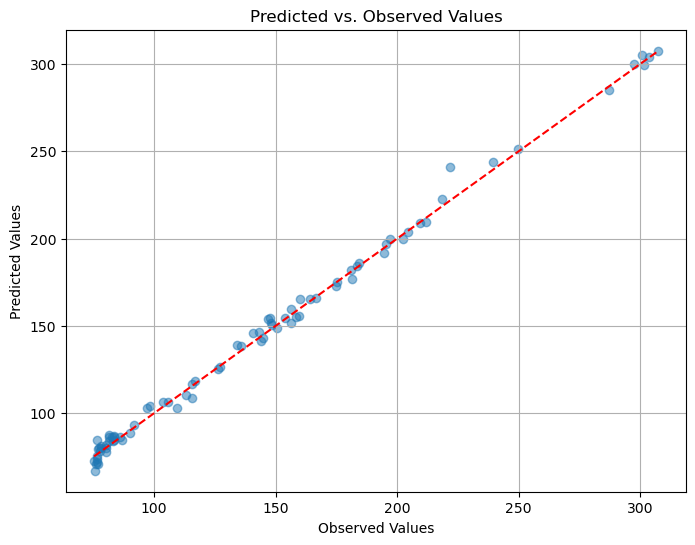

In [70]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()